# SAREK VCF PROCESSING OF MELANOMA SAMPLE TO CALCULATE VAF

In [1]:
# Needed basic packages
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2

# 1/ Reading the VCF files and formating as dataframe

In [2]:
import pandas as pd

# Import MUTECT2 vcf files with no header for melanoma sample
mutect_df = pd.read_csv('/workspace/projects/sjd_melos/vcf_noheader/AB9767_vs_AB9766.mutect2.filtered.noheader.vcf.gz', sep="\t", header=0)
# Import STRELKA vcf files with no header for melanoma sample with split information of SNV or indels

strelka_snv_df = pd.read_csv('/workspace/projects/sjd_melos/vcf_noheader/AB9767_vs_AB9766.strelka.somatic_snvs_noheader.vcf.gz', sep="\t", header=0)
strelka_ind_df = pd.read_csv('/workspace/projects/sjd_melos/vcf_noheader/AB9767_vs_AB9766.strelka.somatic_indels_noheader.vcf.gz', sep="\t", header=0)

In [3]:
mutect_df.shape + strelka_snv_df.shape +  strelka_ind_df.shape

(1350371, 11, 1586460, 11, 17823, 11)

In [4]:
# Rename #CRHOM column to avoid future errors
mutect_df.rename(columns={'#CHROM': 'CHROM'}, inplace=True)
strelka_snv_df.rename(columns={'#CHROM': 'CHROM'}, inplace=True)
strelka_ind_df.rename(columns={'#CHROM': 'CHROM'}, inplace=True)

In [5]:
mutect_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,patient1_AB9767
0,chr1,16949,.,A,C,.,map_qual;normal_artifact;panel_of_normals,"AS_FilterStatus=map_qual;AS_SB_TABLE=107,98|17...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:195,17:0.081:212:93,7:82,9:193,17:100,95,14,3","0/1:10,4:0.301:14:4,3:5,0:10,4:7,3,3,1"
1,chr1,16996,.,T,C,.,map_qual;normal_artifact;panel_of_normals,"AS_FilterStatus=map_qual;AS_SB_TABLE=149,129|2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:264,21:0.075:285:132,10:120,9:264,21:136,1...","0/1:14,4:0.249:18:6,3:8,1:14,4:13,1,3,1"
2,chr1,17375,.,A,G,.,clustered_events;normal_artifact;panel_of_normals,"AS_FilterStatus=SITE;AS_SB_TABLE=365,155|21,8;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:302,13:0.045:315:141,4:145,9:297,13:203,99...","0/1:218,16:0.072:234:101,8:105,8:217,16:162,56..."
3,chr1,17406,.,C,T,.,clustered_events;normal_artifact,"AS_FilterStatus=SITE;AS_SB_TABLE=397,244|16,14...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:346,12:0.036:358:162,3:152,9:341,12:218,12...","0/1:295,18:0.059:313:129,11:134,6:282,17:179,1..."
4,chr1,17452,.,C,T,.,clustered_events;map_qual;normal_artifact,"AS_FilterStatus=map_qual;AS_SB_TABLE=431,357|2...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:386,25:0.059:411:167,10:167,12:379,23:219,...","0/1:402,29:0.068:431:170,16:162,11:390,28:212,..."


# 2/ WORKING WITH MUTECT2 FILES

### A. Select mutations that passed filters

In [6]:
mutect_df = mutect_df[mutect_df['FILTER'] == 'PASS']
mutect_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,patient1_AB9766,patient1_AB9767
14,chr1,31047,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=56,36|1,3;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:75,0:0.013:75:21,0:36,0:73,0:1|0:31029_G_A...","1|0:17,4:0.218:21:1,0:2,1:17,4:1|0:31029_G_A:3..."
18,chr1,52124,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=85,75|5,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:76,0:0.013:76:43,0:22,0:74,0:46,30,0,0","0/1:84,7:0.087:91:29,6:36,1:83,7:39,45,5,2"
19,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0","0/1:18,11:0.387:29:9,6:9,5:18,11:12,6,5,6"
20,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0","0/1:36,10:0.218:46:18,4:16,5:35,9:18,18,4,6"
24,chr1,68340,.,GG,AA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,45|1,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:54,0:0.019:54:29,0:20,0:51,0:24,30,0,0","0/1:27,7:0.229:34:14,3:11,4:26,7:12,15,1,6"


### B. Find the number of reads and depth and create new columns with this information

In [7]:
# Check the header information of the VCF file to find this information and GATK manual information: https://gatk.broadinstitute.org/hc/en-us/articles/360035531692-VCF-Variant-Call-Format

# 1/ Rename columns
mutect_df = mutect_df.rename(columns={'patient1_AB9766': 'NORMAL', 'patient1_AB9767' : 'TUMOR'})

# 2/ Split tumor info from columns using ":" separator and add in new columns
mutect_df = pd.concat([mutect_df, mutect_df['TUMOR'].str.split(':', expand=True)], axis=1)

# 3/ Rename new columns according to FORMAT column in original data 
mutect_df = mutect_df.rename(columns={0:'t_GT', 1: 't_AD', 2:'t_AF', 3: 't_DP', 4: 't_F1R2', 5:'t_F2R1', 6:'t_FAD', 7:'t_PGT', 8:'t_PID', 9:'t_PS', 10:'t_SB'})

In [8]:
# Now repeat 2/ and 3/ steps for the normal sample 
mutect_df = pd.concat([mutect_df, mutect_df['NORMAL'].str.split(':', expand=True)], axis=1)
mutect_df = mutect_df.rename(columns={0:'n_GT', 1: 'n_AD', 2:'n_AF', 3: 'n_DP', 4: 'n_F1R2', 5:'n_F2R1', 6:'n_FAD', 7:'n_PGT', 8:'n_PID', 9:'n_PS', 10:'n_SB'})

# Delete unnecessary information
mutect_df = mutect_df.drop(['n_GT','t_GT','n_F1R2','t_F1R2','n_FAD','t_FAD','n_PGT', 't_PGT', 'n_PID', 't_PID','n_PS','t_PS', 'n_SB', 't_SB', 'n_F2R1', 't_F2R1'], axis=1)

# Add sample name
mutect_df = mutect_df.assign(SAMPLE='melanoma')

In [9]:
mutect_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AD,t_AF,t_DP,n_AD,n_AF,n_DP,SAMPLE
14,chr1,31047,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=56,36|1,3;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:75,0:0.013:75:21,0:36,0:73,0:1|0:31029_G_A...","1|0:17,4:0.218:21:1,0:2,1:17,4:1|0:31029_G_A:3...","17,4",0.218,21,"75,0",0.013,75,melanoma
18,chr1,52124,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=85,75|5,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:76,0:0.013:76:43,0:22,0:74,0:46,30,0,0","0/1:84,7:0.087:91:29,6:36,1:83,7:39,45,5,2","84,7",0.087,91,"76,0",0.013,76,melanoma
19,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0","0/1:18,11:0.387:29:9,6:9,5:18,11:12,6,5,6","18,11",0.387,29,"69,0",0.014,69,melanoma
20,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0","0/1:36,10:0.218:46:18,4:16,5:35,9:18,18,4,6","36,10",0.218,46,"65,0",0.015,65,melanoma
24,chr1,68340,.,GG,AA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,45|1,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:54,0:0.019:54:29,0:20,0:51,0:24,30,0,0","0/1:27,7:0.229:34:14,3:11,4:26,7:12,15,1,6","27,7",0.229,34,"54,0",0.019,54,melanoma


In [10]:
# saving this table a CSV file in directory project

mutect_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_passedmut.tsv.gz', sep ='\t', index=None, compression = "gzip")

### C. Variant allele frequency calculation per each mutation

In [11]:
# Create a new table to calculate VAF
vaf_mutect_df = mutect_df
# Split allele depth frequency column information so it contains reference or alternative allele depth information
vaf_mutect_df[['t_ref_reads', 't_alt_reads']] = vaf_mutect_df['t_AD'].str.split(',', expand=True)
vaf_mutect_df[['n_ref_reads', 'n_alt_reads']] = vaf_mutect_df['n_AD'].str.split(',', expand=True)

vaf_mutect_df = vaf_mutect_df.drop(['t_AD','n_AD'], axis=1) # delete original columns

In [12]:
#Transform columns so they are not strings but operable
vaf_mutect_df[['t_DP', 't_ref_reads', 't_alt_reads']] = vaf_mutect_df[['t_DP', 't_ref_reads', 't_alt_reads']].astype(int)

# Calculate VAF and add it as new column (VAF = number of mutation reads in tumor sample / total depth of the position)

vaf_mutect_df['VAF'] = vaf_mutect_df['t_alt_reads'] / vaf_mutect_df['t_DP']  # obtain the VAF frequency of each allele
vaf_mutect_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_AF,t_DP,n_AF,n_DP,SAMPLE,t_ref_reads,t_alt_reads,n_ref_reads,n_alt_reads,VAF
14,chr1,31047,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=56,36|1,3;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:75,0:0.013:75:21,0:36,0:73,0:1|0:31029_G_A...",...,0.218,21,0.013,75,melanoma,17,4,75,0,0.190476
18,chr1,52124,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=85,75|5,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:76,0:0.013:76:43,0:22,0:74,0:46,30,0,0",...,0.087,91,0.013,76,melanoma,84,7,76,0,0.076923
19,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0",...,0.387,29,0.014,69,melanoma,18,11,69,0,0.379310
20,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0",...,0.218,46,0.015,65,melanoma,36,10,65,0,0.217391
24,chr1,68340,.,GG,AA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,45|1,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:54,0:0.019:54:29,0:20,0:51,0:24,30,0,0",...,0.229,34,0.019,54,melanoma,27,7,54,0,0.205882


In [13]:
# Apply function to discriminate mutation type
def muttype_mutect2(row):
    # Infer mutation type
    if len(row['ALT']) != len(row['REF']):
        return 'INDEL'
    elif len(row['ALT']) == len(row['REF']) and len(row['REF']) > 1:
        return 'MNV'
    else:
        return 'SNV'

vaf_mutect_df['mut_type'] = vaf_mutect_df.apply(muttype_mutect2, axis=1)

In [14]:
vaf_mutect_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_DP,n_AF,n_DP,SAMPLE,t_ref_reads,t_alt_reads,n_ref_reads,n_alt_reads,VAF,mut_type
14,chr1,31047,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=56,36|1,3;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:75,0:0.013:75:21,0:36,0:73,0:1|0:31029_G_A...",...,21,0.013,75,melanoma,17,4,75,0,0.190476,SNV
18,chr1,52124,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=85,75|5,2;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:76,0:0.013:76:43,0:22,0:74,0:46,30,0,0",...,91,0.013,76,melanoma,84,7,76,0,0.076923,SNV
19,chr1,59074,.,C,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=48,39|5,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:69,0:0.014:69:25,0:38,0:67,0:36,33,0,0",...,29,0.014,69,melanoma,18,11,69,0,0.379310,SNV
20,chr1,60739,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=46,55|4,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:65,0:0.015:65:32,0:30,0:65,0:28,37,0,0",...,46,0.015,65,melanoma,36,10,65,0,0.217391,SNV
24,chr1,68340,.,GG,AA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=36,45|1,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:54,0:0.019:54:29,0:20,0:51,0:24,30,0,0",...,34,0.019,54,melanoma,27,7,54,0,0.205882,MNV


In [15]:
# Reorder columns of the dataframe prior to export as CSV
# First check column information:
for col in vaf_mutect_df.columns:
    print(col)

# # Then reorganize columns
vaf_mutect_df.insert(12, 'n_AF', vaf_mutect_df.pop('n_AF'))
vaf_mutect_df.insert(15, 't_alt_reads', vaf_mutect_df.pop('t_alt_reads'))
vaf_mutect_df.insert(21, 'SAMPLE', vaf_mutect_df.pop('SAMPLE'))
vaf_mutect_df.insert(16, 'n_ref_reads', vaf_mutect_df.pop('n_ref_reads'))
vaf_mutect_df.insert(13, 't_DP', vaf_mutect_df.pop('t_DP'))
vaf_mutect_df.insert(14, 'n_DP', vaf_mutect_df.pop('n_DP'))
vaf_mutect_df.insert(17, 't_alt_reads', vaf_mutect_df.pop('t_alt_reads'))
# vaf_mutect_df.head()

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_AF
t_DP
n_AF
n_DP
SAMPLE
t_ref_reads
t_alt_reads
n_ref_reads
n_alt_reads
VAF
mut_type


In [16]:
for col in vaf_mutect_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_AF
n_AF
t_DP
n_DP
n_ref_reads
t_ref_reads
t_alt_reads
n_alt_reads
VAF
mut_type
SAMPLE


In [17]:
vaf_mutect_df.insert(16, 'n_ref_reads', vaf_mutect_df.pop('n_ref_reads'))
# saving this table a CSV file in directory project

vaf_mutect_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_VAF.tsv.gz', sep ='\t', index=None, compression = 'gzip')

In [18]:
# Extract data mut_type from mutect_df to discriminate between SNV and INDELS (note that Strelka does not discriminate between SNV and MNV)
vaf_mutect_snv_df = vaf_mutect_df.query("mut_type == 'SNV' | mut_type == 'MNV'")
vaf_mutect_indels_df = vaf_mutect_df.query("mut_type == 'INDEL'")
vaf_mutect_indels_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,n_AF,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,mut_type,SAMPLE
218,chr1,866964,.,CTCCCCCTGCACTCACATCCCTGACATCCTCCCGTGCTCTCACGTG...,C,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=234,172|3,3;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:224,1:0.011:225:39,1:10,0:185,1:0|1:866964...",...,0.011,187,225,182,224,5,1,0.026738,INDEL,melanoma
324,chr1,927005,.,AGG,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=176,172|16,14...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:181,0:5.268e-03:181:63,0:92,0:179,0:94,87,0,0",...,5.268e-03,197,181,167,181,30,0,0.152284,INDEL,melanoma
957,chr1,2269784,.,ACCTGTGGCTGGCGTGGGTCTGGCGGGTCTGGTGGTGCCTGTGGCT...,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=172,176|1,4;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:178,0:5.668e-03:178:30,0:23,0:167,0:89,89,0,0",...,5.668e-03,175,178,170,178,5,0,0.028571,INDEL,melanoma
1013,chr1,2424519,.,TC,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=145,124|5,11;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:157,0:6.306e-03:157:62,0:74,0:153,0:0|1:24...",...,6.306e-03,128,157,112,157,16,0,0.125000,INDEL,melanoma
1014,chr1,2424522,.,AT,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=145,125|5,11;...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:158,0:6.279e-03:158:62,0:74,0:153,0:0|1:24...",...,6.279e-03,128,158,112,158,16,0,0.125000,INDEL,melanoma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346281,chrY,14960529,.,TCC,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=59,73|7,9;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:76,0:0.013:76:25,0:41,0:71,0:0|1:14960528_...",...,0.013,72,76,56,76,16,0,0.222222,INDEL,melanoma
1346896,chrY,17388767,.,G,GAAAGAAAGAAAGAAAA,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=60,35|7,6;DP=...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:54,0:0.017:54:24,0:15,0:52,0:35,19,0,0",...,0.017,54,54,41,54,13,0,0.240741,INDEL,melanoma
1349766,chrY,56826835,.,TCCA,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=416,495|9,5;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:496,0:1.903e-03:496:180,0:200,0:511,0:0|1:...",...,1.903e-03,429,496,415,496,14,0,0.032634,INDEL,melanoma
1349767,chrY,56826840,.,TCCATTCGATTCC,T,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=414,492|9,5;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:PGT:PID:PS:SB,"0|0:499,0:1.841e-03:499:137,0:175,0:513,0:0|1:...",...,1.841e-03,421,499,407,499,14,0,0.033254,INDEL,melanoma


In [19]:
# Export the list of Mutect2 SNV mutations into a CSV table
vaf_mutect_snv_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_snvmnv_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")
vaf_mutect_indels_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Mutect2_indels_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")

### D. Variant Allele Frequency Plot (histogram or density plot)

In [20]:
#For ploting data check:
#https://www.w3schools.com/python/matplotlib_histograms.asp
#https://matplotlib.org/stable/gallery/statistics/hist.html
#https://pandas.pydata.org/pandas-docs/version/0.13.1/visualization.html
# matplotlib intalled in melos environment through terminal 

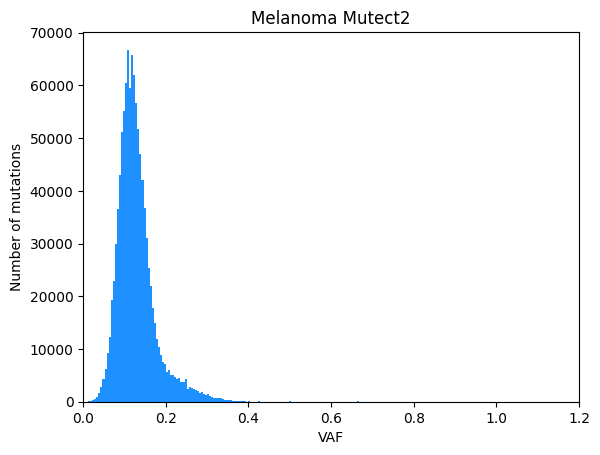

In [21]:
# Represent VAF from mutect2 table

plt.hist(vaf_mutect_df['VAF'].tolist(), bins = 200, color = 'dodgerblue')
plt.xlim([0,1.2])
plt.ylabel('Number of mutations')
plt.xlabel('VAF')
plt.title('Melanoma Mutect2')
plt.show(vaf_mutect_df['VAF'].tolist())  

# 3/ WORKING WITH STRELKA FILES

In [22]:
# FOR THE MELANOMA TUMOR SNVs and INDELS (strelka_snv_df and strelka_ind_df)
# First select mutations that passed filters
strelka_snv_df = strelka_snv_df[strelka_snv_df['FILTER'] == 'PASS']
strelka_ind_df = strelka_ind_df[strelka_ind_df['FILTER'] == 'PASS']

strelka_snv_df.rename(columns={'#CHROM': 'CHROM'}, inplace=True)
strelka_ind_df.rename(columns={'#CHROM': 'CHROM'}, inplace=True)

In [23]:
strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00","129:129:109,109:15,15:6,6:132.29:0.04:0.00:0.00"
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16","136:136:87,120:27,29:32,32:130.51:35.60:0.00:0.27"
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01","161:161:146,147:11,11:6,6:160.11:1.37:0.00:0.01"
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00","130:130:100,101:15,15:14,14:128.65:0.80:0.00:0.00"
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00","122:122:94,94:22,22:4,4:119.64:0.00:0.00:0.00"
...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06","70:70:51,52:12,12:7,7:60.92:3.94:0.00:0.05"
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03","58:58:38,41:11,11:9,7:55.80:0.58:0.00:0.00"
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00","51:51:34,35:11,12:4,4:49.56:0.00:0.00:0.00"
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00","58:58:39,40:14,14:5,5:54.87:0.38:0.00:0.00"


### A. FOR THE INDELS SAMPLE

In [24]:
# Check the header information of the VCF file to find this information and strelka manual in github or paper (https://github.com/Illumina/strelka/blob/v2.9.x/docs/userGuide/README.md; https://academic.oup.com/bioinformatics/article/28/14/1811/218573)

# 1/ Split tumor info from columns using ":" separator and add in new columns
strelka_ind_df = pd.concat([strelka_ind_df, strelka_ind_df['TUMOR'].str.split(':', expand=True)], axis=1)

# 2/ Rename new columns according to FORMAT column in original data 
strelka_ind_df = strelka_ind_df.rename(columns={0:'t_DP', 1: 't_DP2', 2:'t_TAR', 3: 't_TIR', 4: 't_TOR', 5:'t_DP50', 6:'t_FDP50', 7:'t_SUBDP50', 8: 't_BCN50'})
strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,t_DP2,t_TAR,t_TIR,t_TOR,t_DP50,t_FDP50,t_SUBDP50,t_BCN50
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00","129:129:109,109:15,15:6,6:132.29:0.04:0.00:0.00",129,129,"109,109","15,15","6,6",132.29,0.04,0.00,0.00
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16","136:136:87,120:27,29:32,32:130.51:35.60:0.00:0.27",136,136,"87,120","27,29","32,32",130.51,35.60,0.00,0.27
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01","161:161:146,147:11,11:6,6:160.11:1.37:0.00:0.01",161,161,"146,147","11,11","6,6",160.11,1.37,0.00,0.01
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00","130:130:100,101:15,15:14,14:128.65:0.80:0.00:0.00",130,130,"100,101","15,15","14,14",128.65,0.80,0.00,0.00
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00","122:122:94,94:22,22:4,4:119.64:0.00:0.00:0.00",122,122,"94,94","22,22","4,4",119.64,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06","70:70:51,52:12,12:7,7:60.92:3.94:0.00:0.05",70,70,"51,52","12,12","7,7",60.92,3.94,0.00,0.05
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03","58:58:38,41:11,11:9,7:55.80:0.58:0.00:0.00",58,58,"38,41","11,11","9,7",55.80,0.58,0.00,0.00
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00","51:51:34,35:11,12:4,4:49.56:0.00:0.00:0.00",51,51,"34,35","11,12","4,4",49.56,0.00,0.00,0.00
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00","58:58:39,40:14,14:5,5:54.87:0.38:0.00:0.00",58,58,"39,40","14,14","5,5",54.87,0.38,0.00,0.00


In [25]:
# Now repeat 1/ and 2/ steps for the normal sample 
strelka_ind_df = pd.concat([strelka_ind_df, strelka_ind_df['NORMAL'].str.split(':', expand=True)], axis=1)
strelka_ind_df = strelka_ind_df.rename(columns={0:'n_DP', 1: 'n_DP2', 2:'n_TAR', 3: 'n_TIR', 4: 'n_TOR', 5:'n_DP50', 6:'n_FDP50', 7:'n_SUBDP50', 8: 'n_BCN50'})
strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_BCN50,n_DP,n_DP2,n_TAR,n_TIR,n_TOR,n_DP50,n_FDP50,n_SUBDP50,n_BCN50
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00",...,0.00,155,155,"157,162","0,0","0,0",152.11,0.23,0.00,0.00
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16",...,0.27,156,156,"138,182","3,4","27,20",139.01,22.57,0.00,0.16
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01",...,0.01,155,155,"156,157","0,0","2,1",154.13,2.62,0.00,0.01
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00",...,0.00,123,123,"116,117","0,0","6,6",122.56,0.15,0.00,0.00
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00",...,0.00,139,139,"138,138","0,0","0,0",140.89,0.19,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06",...,0.05,52,52,"49,51","1,1","4,4",48.22,3.90,0.00,0.06
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03",...,0.00,65,65,"53,54","0,1","12,10",65.75,2.14,0.00,0.03
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00",...,0.00,49,49,"44,45","1,1","2,2",50.90,0.00,0.00,0.00
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00",...,0.00,63,63,"53,55","0,0","10,9",62.82,0.76,0.00,0.00


In [26]:
# Delete unnecessary information
strelka_ind_df = strelka_ind_df.drop(columns=['n_DP2','t_DP2','n_TOR','t_TOR','n_DP50','t_DP50','n_FDP50','t_FDP50','n_SUBDP50','t_SUBDP50','n_BCN50','t_BCN50'])
strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,t_TAR,t_TIR,n_DP,n_TAR,n_TIR
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00","129:129:109,109:15,15:6,6:132.29:0.04:0.00:0.00",129,"109,109","15,15",155,"157,162","0,0"
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16","136:136:87,120:27,29:32,32:130.51:35.60:0.00:0.27",136,"87,120","27,29",156,"138,182","3,4"
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01","161:161:146,147:11,11:6,6:160.11:1.37:0.00:0.01",161,"146,147","11,11",155,"156,157","0,0"
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00","130:130:100,101:15,15:14,14:128.65:0.80:0.00:0.00",130,"100,101","15,15",123,"116,117","0,0"
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00","122:122:94,94:22,22:4,4:119.64:0.00:0.00:0.00",122,"94,94","22,22",139,"138,138","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06","70:70:51,52:12,12:7,7:60.92:3.94:0.00:0.05",70,"51,52","12,12",52,"49,51","1,1"
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03","58:58:38,41:11,11:9,7:55.80:0.58:0.00:0.00",58,"38,41","11,11",65,"53,54","0,1"
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00","51:51:34,35:11,12:4,4:49.56:0.00:0.00:0.00",51,"34,35","11,12",49,"44,45","1,1"
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00","58:58:39,40:14,14:5,5:54.87:0.38:0.00:0.00",58,"39,40","14,14",63,"53,55","0,0"


In [27]:
# Add sample name and mutation type
strelka_ind_df = strelka_ind_df.assign(SAMPLE='melanoma')
strelka_ind_df = strelka_ind_df.assign(Mut_type='INDEL')
strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,t_TAR,t_TIR,n_DP,n_TAR,n_TIR,SAMPLE,Mut_type
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00","129:129:109,109:15,15:6,6:132.29:0.04:0.00:0.00",129,"109,109","15,15",155,"157,162","0,0",melanoma,INDEL
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16","136:136:87,120:27,29:32,32:130.51:35.60:0.00:0.27",136,"87,120","27,29",156,"138,182","3,4",melanoma,INDEL
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01","161:161:146,147:11,11:6,6:160.11:1.37:0.00:0.01",161,"146,147","11,11",155,"156,157","0,0",melanoma,INDEL
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00","130:130:100,101:15,15:14,14:128.65:0.80:0.00:0.00",130,"100,101","15,15",123,"116,117","0,0",melanoma,INDEL
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00","122:122:94,94:22,22:4,4:119.64:0.00:0.00:0.00",122,"94,94","22,22",139,"138,138","0,0",melanoma,INDEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06","70:70:51,52:12,12:7,7:60.92:3.94:0.00:0.05",70,"51,52","12,12",52,"49,51","1,1",melanoma,INDEL
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03","58:58:38,41:11,11:9,7:55.80:0.58:0.00:0.00",58,"38,41","11,11",65,"53,54","0,1",melanoma,INDEL
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00","51:51:34,35:11,12:4,4:49.56:0.00:0.00:0.00",51,"34,35","11,12",49,"44,45","1,1",melanoma,INDEL
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00","58:58:39,40:14,14:5,5:54.87:0.38:0.00:0.00",58,"39,40","14,14",63,"53,55","0,0",melanoma,INDEL


In [28]:
# saving this table a CSV file in directory project

strelka_ind_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_indels_passedmut.tsv.gz', sep ='\t', index=None, compression = "gzip")

In [29]:
# From tumor information split allele reads from reference or alternate allele into tier1 and tier2 comma separated values
vaf_strelka_ind_df = strelka_ind_df #create a new variable from previous tab
vaf_strelka_ind_df[['t_TIR_tier1', 't_TIR_tier2']] = vaf_strelka_ind_df['t_TIR'].str.split(',', expand=True)
vaf_strelka_ind_df[['t_TAR_tier1', 't_TAR_tier2']] = vaf_strelka_ind_df['t_TAR'].str.split(',', expand=True)
vaf_strelka_ind_df = vaf_strelka_ind_df.drop(['t_TIR','t_TAR'], axis=1) # delete original column

# Now from normal sample split allele reads from reference or alternate allele into tier1 and tier2 comma separated values
vaf_strelka_ind_df[['n_TIR_tier1', 'n_TIR_tier2']] = vaf_strelka_ind_df['n_TIR'].str.split(',', expand=True)
vaf_strelka_ind_df[['n_TAR_tier1', 'n_TAR_tier2']] = vaf_strelka_ind_df['n_TAR'].str.split(',', expand=True)
vaf_strelka_ind_df = vaf_strelka_ind_df.drop(['n_TIR','n_TAR'], axis=1) # delete original column

In [30]:
vaf_strelka_ind_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,SAMPLE,Mut_type,t_TIR_tier1,t_TIR_tier2,t_TAR_tier1,t_TAR_tier2,n_TIR_tier1,n_TIR_tier2,n_TAR_tier1,n_TAR_tier2
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00",...,melanoma,INDEL,15,15,109,109,0,0,157,162
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16",...,melanoma,INDEL,27,29,87,120,3,4,138,182
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01",...,melanoma,INDEL,11,11,146,147,0,0,156,157
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00",...,melanoma,INDEL,15,15,100,101,0,0,116,117
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00",...,melanoma,INDEL,22,22,94,94,0,0,138,138


In [31]:
#Transform columns so they are not strings but operable
vaf_strelka_ind_df[['t_DP', 't_TIR_tier1']] = vaf_strelka_ind_df[['t_DP', 't_TIR_tier1']].astype(int)

# Calculation of VAF in tumor sample
vaf_strelka_ind_df['VAF'] = vaf_strelka_ind_df['t_TIR_tier1'] / vaf_strelka_ind_df['t_DP']  # obtain the VAF frequency of each allele
vaf_strelka_ind_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,Mut_type,t_TIR_tier1,t_TIR_tier2,t_TAR_tier1,t_TAR_tier2,n_TIR_tier1,n_TIR_tier2,n_TAR_tier1,n_TAR_tier2,VAF
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00",...,INDEL,15,15,109,109,0,0,157,162,0.116279
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16",...,INDEL,27,29,87,120,3,4,138,182,0.198529
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01",...,INDEL,11,11,146,147,0,0,156,157,0.068323
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00",...,INDEL,15,15,100,101,0,0,116,117,0.115385
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00",...,INDEL,22,22,94,94,0,0,138,138,0.180328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06",...,INDEL,12,12,51,52,1,1,49,51,0.171429
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03",...,INDEL,11,11,38,41,0,1,53,54,0.189655
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00",...,INDEL,11,12,34,35,1,1,44,45,0.215686
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00",...,INDEL,14,14,39,40,0,0,53,55,0.241379


In [32]:
# Rename columns
vaf_strelka_ind_df.rename(columns={'t_TIR_tier1': 't_alt_reads','n_TIR_tier1':'n_alt_reads','t_TAR_tier1':'t_ref_reads','n_TAR_tier1':'n_ref_reads'}, inplace=True)

# Drop unnecessary columns:
vaf_strelka_ind_df = vaf_strelka_ind_df.drop(['t_TIR_tier2','t_TAR_tier2','n_TIR_tier2','n_TAR_tier2'], axis=1) # delete original column

In [33]:
# First check column information:
for col in vaf_strelka_ind_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
n_DP
SAMPLE
Mut_type
t_alt_reads
t_ref_reads
n_alt_reads
n_ref_reads
VAF


In [34]:
# Then reorganize columns
vaf_strelka_ind_df.insert(19, 'SAMPLE', vaf_strelka_ind_df.pop('SAMPLE'))
vaf_strelka_ind_df.insert(18, 'Mut_type', vaf_strelka_ind_df.pop('Mut_type'))
vaf_strelka_ind_df.insert(18, 'Mut_type', vaf_strelka_ind_df.pop('Mut_type'))
vaf_strelka_ind_df.insert(13, 't_ref_reads', vaf_strelka_ind_df.pop('t_ref_reads'))
vaf_strelka_ind_df.insert(14, 'n_ref_reads', vaf_strelka_ind_df.pop('n_ref_reads'))

for col in vaf_strelka_ind_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
n_DP
t_ref_reads
n_ref_reads
t_alt_reads
n_alt_reads
VAF
Mut_type
SAMPLE


In [35]:
vaf_strelka_ind_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,Mut_type,SAMPLE
11,chr1,2424520,.,CCA,C,.,PASS,IC=0;IHP=2;MQ=60.00;MQ0=0;NT=ref;QSI=92;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:157,162:0,0:0,0:152.11:0.23:0.00:0.00","129:129:109,109:15,15:6,6:132.29:0.04:0.00:0.00",129,155,109,157,15,0,0.116279,INDEL,melanoma
17,chr1,4064426,.,TCA,T,.,PASS,IC=2;IHP=2;MQ=52.76;MQ0=3;NT=ref;QSI=61;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"156:156:138,182:3,4:27,20:139.01:22.57:0.00:0.16","136:136:87,120:27,29:32,32:130.51:35.60:0.00:0.27",136,156,87,138,27,3,0.198529,INDEL,melanoma
20,chr1,4087079,.,G,GATA,.,PASS,IC=1;IHP=3;MQ=60.00;MQ0=0;NT=ref;QSI=72;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"155:155:156,157:0,0:2,1:154.13:2.62:0.00:0.01","161:161:146,147:11,11:6,6:160.11:1.37:0.00:0.01",161,155,146,156,11,0,0.068323,INDEL,melanoma
21,chr1,4146586,.,C,CT,.,PASS,IC=9;IHP=9;MQ=60.00;MQ0=0;NT=ref;QSI=76;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"123:123:116,117:0,0:6,6:122.56:0.15:0.00:0.00","130:130:100,101:15,15:14,14:128.65:0.80:0.00:0.00",130,123,100,116,15,0,0.115385,INDEL,melanoma
22,chr1,5145337,.,TC,T,.,PASS,IC=0;IHP=5;MQ=60.00;MQ0=0;NT=ref;QSI=118;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"139:139:138,138:0,0:0,0:140.89:0.19:0.00:0.00","122:122:94,94:22,22:4,4:119.64:0.00:0.00:0.00",122,139,94,138,22,0,0.180328,INDEL,melanoma


In [36]:
# Save in a new file with passed mutations
vaf_strelka_ind_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_indels_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")

### B. FOR THE SNV SAMPLE

In [37]:
# Check the header information of the VCF file to find this information and strelka manual in github or paper (https://github.com/Illumina/strelka/blob/v2.9.x/docs/userGuide/README.md; https://academic.oup.com/bioinformatics/article/28/14/1811/218573)

# 1/ Split TUMOR info from column using ":" separator and add in new columns
strelka_snv_df = pd.concat([strelka_snv_df, strelka_snv_df['TUMOR'].str.split(':', expand=True)], axis=1)

# 2/ Rename new columns according to FORMAT column in original data 
strelka_snv_df = strelka_snv_df.rename(columns={0:'t_DP', 1: 't_FDP', 2:'t_SDP', 3: 't_SUBDP', 4: 't_AU', 5:'t_CU', 6:'t_GU', 7:'t_TU'})
strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,t_FDP,t_SDP,t_SUBDP,t_AU,t_CU,t_GU,t_TU
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0","29:0:0:0:0,0:18,69:0,0:11,16",29,0,0,0,"0,0","18,69","0,0","11,16"
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0","45:0:0:0:9,13:0,0:36,59:0,0",45,0,0,0,"9,13","0,0","36,59","0,0"
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0","88:3:0:0:0,2:76,88:0,0:9,12",88,3,0,0,"0,2","76,88","0,0","9,12"
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0","76:1:0:0:0,0:61,178:0,1:14,25",76,1,0,0,"0,0","61,178","0,1","14,25"
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0","78:0:0:0:14,24:0,0:64,171:0,1",78,0,0,0,"14,24","0,0","64,171","0,1"


In [38]:
# Now repeat 1/ and 2/ steps for the normal sample 
strelka_snv_df = pd.concat([strelka_snv_df, strelka_snv_df['NORMAL'].str.split(':', expand=True)], axis=1)
strelka_snv_df = strelka_snv_df.rename(columns={0:'n_DP', 1: 'n_FDP', 2:'n_SDP', 3: 'n_SUBDP', 4: 'n_AU', 5:'n_CU', 6:'n_GU', 7:'n_TU'})
strelka_snv_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_GU,t_TU,n_DP,n_FDP,n_SDP,n_SUBDP,n_AU,n_CU,n_GU,n_TU
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,"0,0","11,16",69,0,0,0,"0,1","69,97","0,0","0,0"
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,"36,59","0,0",65,0,0,0,"0,0","0,0","65,79","0,0"
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,"0,0","9,12",108,1,0,0,"0,0","107,115","0,0","0,0"
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,"0,1","14,25",159,1,0,0,"0,0","158,205","0,0","0,0"
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,"64,171","0,1",106,0,0,0,"0,0","0,0","106,197","0,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586138,chrY,26663364,.,C,T,.,PASS,DP=203;MQ=45.81;MQ0=26;NT=ref;QSS=115;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"75:1:0:0:0,1:74,101:0,0:0,0",...,"0,0","17,18",75,1,0,0,"0,1","74,101","0,0","0,0"
1586150,chrY,26665414,.,A,T,.,PASS,DP=130;MQ=56.13;MQ0=4;NT=ref;QSS=107;QSS_NT=10...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"54:0:0:0:54,65:0,0:0,0:0,0",...,"0,0","16,16",54,0,0,0,"54,65","0,0","0,0","0,0"
1586221,chrY,56771366,.,A,C,.,PASS,DP=6134;MQ=5.97;MQ0=5563;NT=ref;QSS=200;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"127:1:5:0:111,3059:15,49:0,1:0,1",...,"0,0","0,7",127,1,5,0,"111,3059","15,49","0,1","0,1"
1586271,chrY,56828925,.,A,G,.,PASS,DP=2555;MQ=43.88;MQ0=300;NT=ref;QSS=400;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"583:93:8:0:489,1047:0,1:1,38:0,5",...,"118,361","0,24",583,93,8,0,"489,1047","0,1","1,38","0,5"


In [39]:
# First check column information:
for col in strelka_snv_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
t_FDP
t_SDP
t_SUBDP
t_AU
t_CU
t_GU
t_TU
n_DP
n_FDP
n_SDP
n_SUBDP
n_AU
n_CU
n_GU
n_TU


In [40]:
# Delete unnecessary information
strelka_snv_df = strelka_snv_df.drop(columns=['n_FDP','n_SDP','n_SUBDP','t_FDP','t_SDP','t_SUBDP'])
strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_DP,t_AU,t_CU,t_GU,t_TU,n_DP,n_AU,n_CU,n_GU,n_TU
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,29,"0,0","18,69","0,0","11,16",69,"0,1","69,97","0,0","0,0"
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,45,"9,13","0,0","36,59","0,0",65,"0,0","0,0","65,79","0,0"
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,88,"0,2","76,88","0,0","9,12",108,"0,0","107,115","0,0","0,0"
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,76,"0,0","61,178","0,1","14,25",159,"0,0","158,205","0,0","0,0"
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,78,"14,24","0,0","64,171","0,1",106,"0,0","0,0","106,197","0,0"


In [41]:
# Add sample name and mutation type
strelka_snv_df = strelka_snv_df.assign(SAMPLE='melanoma')
strelka_snv_df = strelka_snv_df.assign(Mut_type='SNV')
strelka_snv_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_CU,t_GU,t_TU,n_DP,n_AU,n_CU,n_GU,n_TU,SAMPLE,Mut_type
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,"18,69","0,0","11,16",69,"0,1","69,97","0,0","0,0",melanoma,SNV
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,"0,0","36,59","0,0",65,"0,0","0,0","65,79","0,0",melanoma,SNV
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,"76,88","0,0","9,12",108,"0,0","107,115","0,0","0,0",melanoma,SNV
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,"61,178","0,1","14,25",159,"0,0","158,205","0,0","0,0",melanoma,SNV
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,"0,0","64,171","0,1",106,"0,0","0,0","106,197","0,0",melanoma,SNV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586138,chrY,26663364,.,C,T,.,PASS,DP=203;MQ=45.81;MQ0=26;NT=ref;QSS=115;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"75:1:0:0:0,1:74,101:0,0:0,0",...,"49,81","0,0","17,18",75,"0,1","74,101","0,0","0,0",melanoma,SNV
1586150,chrY,26665414,.,A,T,.,PASS,DP=130;MQ=56.13;MQ0=4;NT=ref;QSS=107;QSS_NT=10...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"54:0:0:0:54,65:0,0:0,0:0,0",...,"1,1","0,0","16,16",54,"54,65","0,0","0,0","0,0",melanoma,SNV
1586221,chrY,56771366,.,A,C,.,PASS,DP=6134;MQ=5.97;MQ0=5563;NT=ref;QSS=200;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"127:1:5:0:111,3059:15,49:0,1:0,1",...,"33,88","0,0","0,7",127,"111,3059","15,49","0,1","0,1",melanoma,SNV
1586271,chrY,56828925,.,A,G,.,PASS,DP=2555;MQ=43.88;MQ0=300;NT=ref;QSS=400;QSS_NT...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"583:93:8:0:489,1047:0,1:1,38:0,5",...,"1,13","118,361","0,24",583,"489,1047","0,1","1,38","0,5",melanoma,SNV


In [42]:
#saving this table a CSV file in directory project

strelka_snv_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_SNV_passedmut.tsv.gz', sep ='\t', index=None, compression = "gzip")

In [43]:
# Split information to calculate VAF from sample

vaf_strelka_snv_df = strelka_snv_df 

# Split allele depth frequency column information so it contains tier1 or tier2 allele depth information
vaf_strelka_snv_df[['t_A_tier1', 't_A_tier2']] = vaf_strelka_snv_df['t_AU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_AU'], axis=1) # delete original column
vaf_strelka_snv_df[['t_C_tier1', 't_C_tier2']] = vaf_strelka_snv_df['t_CU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_CU'], axis=1) # delete original column
vaf_strelka_snv_df[['t_G_tier1', 't_G_tier2']] = vaf_strelka_snv_df['t_GU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_GU'], axis=1) # delete original column
vaf_strelka_snv_df[['t_T_tier1', 't_T_tier2']] = vaf_strelka_snv_df['t_TU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_TU'], axis=1) # delete original column


In [44]:
# Now the same for normal sample: split allele depth frequency column information so it contains tier1 or tier2 allele depth information
vaf_strelka_snv_df[['n_A_tier1', 'n_A_tier2']] = vaf_strelka_snv_df['n_AU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['n_AU'], axis=1) # delete original column
vaf_strelka_snv_df[['n_C_tier1', 'n_C_tier2']] = vaf_strelka_snv_df['n_CU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['n_CU'], axis=1) # delete original column
vaf_strelka_snv_df[['n_G_tier1', 'n_G_tier2']] = vaf_strelka_snv_df['n_GU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['n_GU'], axis=1) # delete original column
vaf_strelka_snv_df[['n_T_tier1', 'n_T_tier2']] = vaf_strelka_snv_df['n_TU'].str.split(',', expand=True)
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['n_TU'], axis=1) # delete original column

In [45]:
# Delete rows that contain tier2 that is unnecessary for the next steps
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_A_tier2', 'n_A_tier2','t_C_tier2','n_C_tier2','t_G_tier2', 'n_G_tier2', 't_T_tier2', 'n_T_tier2'], axis=1)

#Transform columns so they are not strings but operable with pd function to_numeric
vaf_strelka_snv_df = pd.DataFrame(vaf_strelka_snv_df)
vaf_strelka_snv_df[['t_DP', 't_A_tier1', 't_C_tier1', 't_G_tier1', 't_T_tier1']] = vaf_strelka_snv_df[['t_DP', 't_A_tier1', 't_C_tier1','t_G_tier1','t_T_tier1']].apply(pd.to_numeric)

In [46]:
vaf_strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,SAMPLE,Mut_type,t_A_tier1,t_C_tier1,t_G_tier1,t_T_tier1,n_A_tier1,n_C_tier1,n_G_tier1,n_T_tier1
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,melanoma,SNV,0,18,0,11,0,69,0,0
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,melanoma,SNV,9,0,36,0,0,0,65,0
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,melanoma,SNV,0,76,0,9,0,107,0,0
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,melanoma,SNV,0,61,0,14,0,158,0,0
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,melanoma,SNV,14,0,64,0,0,0,106,0


In [47]:
# First check column information:
for col in strelka_snv_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
t_AU
t_CU
t_GU
t_TU
n_DP
n_AU
n_CU
n_GU
n_TU
SAMPLE
Mut_type
t_A_tier1
t_A_tier2


In [48]:
# Define a function that applies the value of 'X_tier1' column depending on the value on 'ALT' column for tumor sample
def get_allele_alt_tumor(row):
    alt = row['ALT']
    if alt == 'A':
        vaf_alt = row['t_A_tier1']
    elif alt == 'T':
        vaf_alt = row['t_T_tier1']
    elif alt == 'C':
        vaf_alt = row['t_C_tier1']
    else:
        vaf_alt = row['t_G_tier1']
    return vaf_alt


# # Define a function that applies the value of 'X_tier1' column depending on the value on 'ALT' column for blood sample
def get_allele_alt_normal(row):
    alt = row['ALT']
    if alt == 'A':
        vaf_alt = row['n_A_tier1']
    elif alt == 'T':
        vaf_alt = row['n_T_tier1']
    elif alt == 'C':
        vaf_alt = row['n_C_tier1']
    else:
        vaf_alt = row['n_G_tier1']
    return vaf_alt


# Apply the function so it returns in each row the corresponding allele depth:
vaf_strelka_snv_df = vaf_strelka_snv_df.loc[0:]
vaf_strelka_snv_df['t_alt_reads'] = vaf_strelka_snv_df.apply(lambda row: get_allele_alt_tumor(row), axis =1) 
vaf_strelka_snv_df['n_alt_reads'] = vaf_strelka_snv_df.apply(lambda row: get_allele_alt_normal(row), axis =1)
vaf_strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_A_tier1,t_C_tier1,t_G_tier1,t_T_tier1,n_A_tier1,n_C_tier1,n_G_tier1,n_T_tier1,t_alt_reads,n_alt_reads
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,0,18,0,11,0,69,0,0,11,0
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,9,0,36,0,0,0,65,0,9,0
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,0,76,0,9,0,107,0,0,9,0
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,0,61,0,14,0,158,0,0,14,0
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,14,0,64,0,0,0,106,0,14,0


In [49]:
# Define a function that applies the value of 'X_tier1' column depending on the value on 'REF' column for blood sample
def get_allele_ref_normal(row):
    ref = row['REF']
    if ref == 'A':
        vaf_ref = row['n_A_tier1']
    elif ref == 'T':
        vaf_ref = row['n_T_tier1']
    elif ref == 'C':
        vaf_ref = row['n_C_tier1']
    else:
        vaf_ref = row['n_G_tier1']
    return vaf_ref

# Define a function that applies the value of 'X_tier1' column depending on the value on 'REF' column for tumor sample
def get_allele_ref_tumor(row):
    ref = row['REF']
    if ref == 'A':
        vaf_ref = row['t_A_tier1']
    elif ref == 'T':
        vaf_ref = row['t_T_tier1']
    elif ref == 'C':
        vaf_ref = row['t_C_tier1']
    else:
        vaf_ref = row['t_G_tier1']
    return vaf_ref
    
# Apply the function so it returns in each row the corresponding allele depth:
vaf_strelka_snv_df = vaf_strelka_snv_df.loc[0:]
vaf_strelka_snv_df['n_ref_reads'] = vaf_strelka_snv_df.apply(lambda row: get_allele_ref_normal(row), axis =1) 
vaf_strelka_snv_df['t_ref_reads'] = vaf_strelka_snv_df.apply(lambda row: get_allele_ref_tumor(row), axis =1) 
vaf_strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_G_tier1,t_T_tier1,n_A_tier1,n_C_tier1,n_G_tier1,n_T_tier1,t_alt_reads,n_alt_reads,n_ref_reads,t_ref_reads
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,0,11,0,69,0,0,11,0,69,18
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,36,0,0,0,65,0,9,0,65,36
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,0,9,0,107,0,0,9,0,107,76
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,0,14,0,158,0,0,14,0,158,61
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,64,0,0,0,106,0,14,0,106,64


In [50]:
#Now we can apply the calculation of VAF
vaf_strelka_snv_df['VAF'] = vaf_strelka_snv_df['t_alt_reads'] / vaf_strelka_snv_df['t_DP']  # obtain the VAF frequency of each allele
vaf_strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,...,t_T_tier1,n_A_tier1,n_C_tier1,n_G_tier1,n_T_tier1,t_alt_reads,n_alt_reads,n_ref_reads,t_ref_reads,VAF
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0",...,11,0,69,0,0,11,0,69,18,0.379310
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0",...,0,0,0,65,0,9,0,65,36,0.200000
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0",...,9,0,107,0,0,9,0,107,76,0.102273
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0",...,14,0,158,0,0,14,0,158,61,0.184211
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0",...,0,0,0,106,0,14,0,106,64,0.179487


In [51]:
# Check column names to reorder:
for col in vaf_strelka_snv_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
n_DP
SAMPLE
Mut_type
t_A_tier1
t_C_tier1
t_G_tier1
t_T_tier1
n_A_tier1
n_C_tier1
n_G_tier1
n_T_tier1
t_alt_reads
n_alt_reads
n_ref_reads
t_ref_reads
VAF


In [52]:
# Delete unnecessary columns
vaf_strelka_snv_df = vaf_strelka_snv_df.drop(['t_A_tier1','t_C_tier1','t_G_tier1','t_T_tier1','n_A_tier1','n_C_tier1','n_G_tier1','n_T_tier1'], axis=1) # delete original column

# Check column names to reorder:
for col in vaf_strelka_snv_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
n_DP
SAMPLE
Mut_type
t_alt_reads
n_alt_reads
n_ref_reads
t_ref_reads
VAF


In [53]:
# Reorder columns:
vaf_strelka_snv_df.insert(18, 'SAMPLE', vaf_strelka_snv_df.pop('SAMPLE'))
vaf_strelka_snv_df.insert(19, 'Mut_type', vaf_strelka_snv_df.pop('Mut_type'))
vaf_strelka_snv_df.insert(13, 't_ref_reads', vaf_strelka_snv_df.pop('t_ref_reads'))
vaf_strelka_snv_df.insert(14, 'n_ref_reads', vaf_strelka_snv_df.pop('n_ref_reads'))
vaf_strelka_snv_df.insert(17, 'VAF', vaf_strelka_snv_df.pop('VAF'))

In [54]:
# Check column names to reorder:
for col in vaf_strelka_snv_df.columns:
    print(col)

CHROM
POS
ID
REF
ALT
QUAL
FILTER
INFO
FORMAT
NORMAL
TUMOR
t_DP
n_DP
t_ref_reads
n_ref_reads
t_alt_reads
n_alt_reads
VAF
SAMPLE
Mut_type


In [55]:
vaf_strelka_snv_df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,SAMPLE,Mut_type
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0","29:0:0:0:0,0:18,69:0,0:11,16",29,69,18,69,11,0,0.379310,melanoma,SNV
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0","45:0:0:0:9,13:0,0:36,59:0,0",45,65,36,65,9,0,0.200000,melanoma,SNV
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0","88:3:0:0:0,2:76,88:0,0:9,12",88,108,76,107,9,0,0.102273,melanoma,SNV
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0","76:1:0:0:0,0:61,178:0,1:14,25",76,159,61,158,14,0,0.184211,melanoma,SNV
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0","78:0:0:0:14,24:0,0:64,171:0,1",78,106,64,106,14,0,0.179487,melanoma,SNV


In [56]:
# saving this table a CSV file in directory project

vaf_strelka_snv_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_SNV_VAF.tsv.gz', sep ='\t', index=None, compression = "gzip")

In [57]:
# Join SNV and INDEL tabs into a new Strelka file
strelka_all_df = pd.concat([vaf_strelka_snv_df, vaf_strelka_ind_df])
strelka_all_df

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_DP,n_DP,t_ref_reads,n_ref_reads,t_alt_reads,n_alt_reads,VAF,SAMPLE,Mut_type
23,chr1,59074,.,C,T,.,PASS,DP=183;MQ=29.23;MQ0=53;NT=ref;QSS=111;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"69:0:0:0:0,1:69,97:0,0:0,0","29:0:0:0:0,0:18,69:0,0:11,16",29,69,18,69,11,0,0.379310,melanoma,SNV
24,chr1,60739,.,G,A,.,PASS,DP=151;MQ=43.70;MQ0=21;NT=ref;QSS=94;QSS_NT=94...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"65:0:0:0:0,0:0,0:65,79:0,0","45:0:0:0:9,13:0,0:36,59:0,0",45,65,36,65,9,0,0.200000,melanoma,SNV
50,chr1,86292,.,C,T,.,PASS,DP=217;MQ=52.79;MQ0=5;NT=ref;QSS=88;QSS_NT=88;...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"108:1:0:0:0,0:107,115:0,0:0,0","88:3:0:0:0,2:76,88:0,0:9,12",88,108,76,107,9,0,0.102273,melanoma,SNV
63,chr1,108632,.,C,T,.,PASS,DP=409;MQ=32.74;MQ0=50;NT=ref;QSS=129;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"159:1:0:0:0,0:158,205:0,0:0,0","76:1:0:0:0,0:61,178:0,1:14,25",76,159,61,158,14,0,0.184211,melanoma,SNV
65,chr1,115637,.,G,A,.,PASS,DP=394;MQ=35.03;MQ0=77;NT=ref;QSS=112;QSS_NT=1...,DP:FDP:SDP:SUBDP:AU:CU:GU:TU,"106:0:0:0:0,0:0,0:106,197:0,0","78:0:0:0:14,24:0,0:64,171:0,1",78,106,64,106,14,0,0.179487,melanoma,SNV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17793,chrY,15208141,.,G,GAAAA,.,PASS,IC=7;IHP=6;MQ=55.27;MQ0=0;NT=ref;QSI=35;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"52:52:49,51:1,1:4,4:48.22:3.90:0.00:0.06","70:70:51,52:12,12:7,7:60.92:3.94:0.00:0.05",70,52,51,49,12,1,0.171429,melanoma,INDEL
17800,chrY,16606322,.,T,TA,.,PASS,IC=13;IHP=13;MQ=60.00;MQ0=0;NT=ref;QSI=60;QSI_...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"65:65:53,54:0,1:12,10:65.75:2.14:0.00:0.03","58:58:38,41:11,11:9,7:55.80:0.58:0.00:0.00",58,65,38,53,11,0,0.189655,melanoma,INDEL
17803,chrY,16953054,.,C,CA,.,PASS,IC=9;IHP=10;MQ=59.95;MQ0=0;NT=ref;QSI=64;QSI_N...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"49:49:44,45:1,1:2,2:50.90:0.00:0.00:0.00","51:51:34,35:11,12:4,4:49.56:0.00:0.00:0.00",51,49,34,44,11,1,0.215686,melanoma,INDEL
17813,chrY,20919814,.,C,CT,.,PASS,IC=9;IHP=8;MQ=60.00;MQ0=0;NT=ref;QSI=75;QSI_NT...,DP:DP2:TAR:TIR:TOR:DP50:FDP50:SUBDP50:BCN50,"63:63:53,55:0,0:10,9:62.82:0.76:0.00:0.00","58:58:39,40:14,14:5,5:54.87:0.38:0.00:0.00",58,63,39,53,14,0,0.241379,melanoma,INDEL


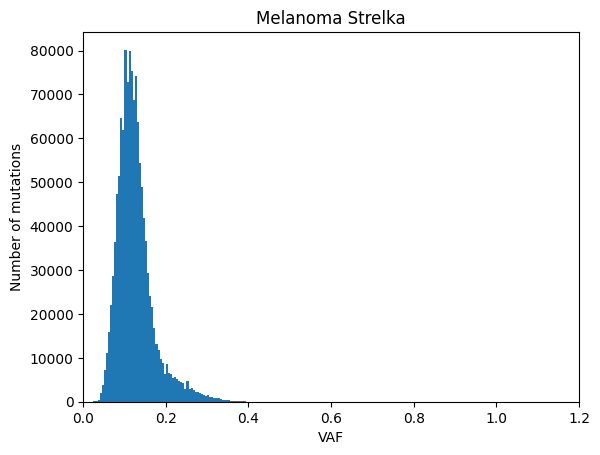

In [58]:
plt.hist(strelka_all_df['VAF'].tolist(), bins = 200)
plt.xlim([0,1.2]) 
plt.ylabel('Number of mutations')
plt.xlabel('VAF')
plt.title('Melanoma Strelka')
plt.show(strelka_all_df['VAF'].tolist()) 

In [59]:
# saving this table a CSV file in directory project

strelka_all_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_Strelka_VAF_all.tsv.gz', sep ='\t', index=None, compression = "gzip")

# 4/ Represent VAF considering SNPs and INDEL mutations

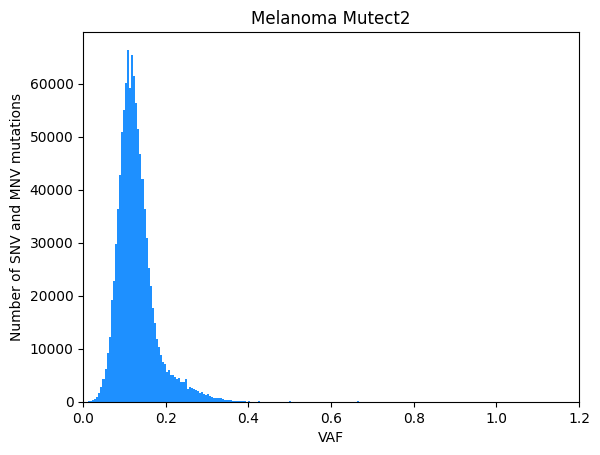

In [60]:
# Now represent VAF of each indel for Mutect and Strelka SNV/INDEL tables obtained above

# For SNV in Mutect2
plt.hist(vaf_mutect_snv_df['VAF'].tolist(), bins = 200, color = "dodgerblue")
plt.xlim([0,1.2])
plt.ylabel('Number of SNV and MNV mutations')
plt.xlabel('VAF')
plt.title('Melanoma Mutect2')
plt.show(vaf_mutect_snv_df['VAF'].tolist())  

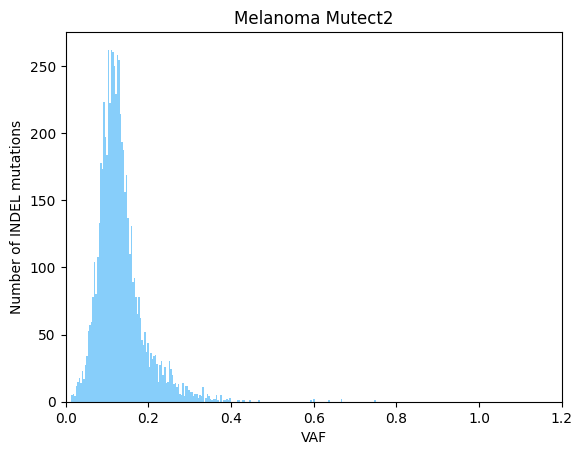

In [61]:
# For INDELs in Mutect2

plt.hist(vaf_mutect_indels_df['VAF'].tolist(), bins = 200, color = "lightskyblue")
plt.xlim([0,1.2])
plt.ylabel('Number of INDEL mutations')
plt.xlabel('VAF')
plt.title('Melanoma Mutect2')
plt.show(vaf_mutect_indels_df['VAF'].tolist())  

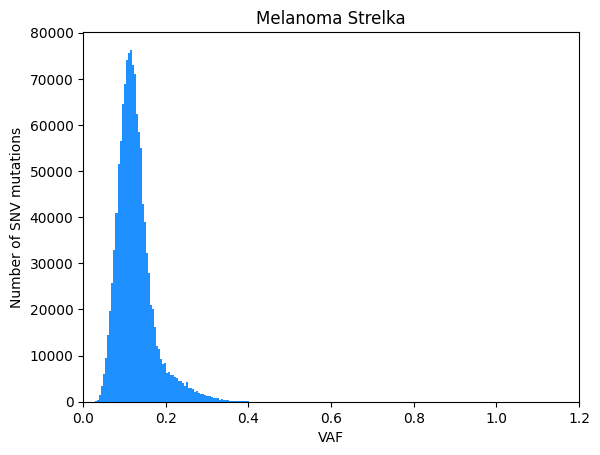

In [62]:
# For SNV in Strelka (the caller does not distinguish between MNV an SNV)

plt.hist(vaf_strelka_snv_df['VAF'].tolist(), bins = 200, color = "dodgerblue")
plt.xlim([0,1.2]) 
plt.ylabel('Number of SNV mutations')
plt.xlabel('VAF')
plt.title('Melanoma Strelka')
plt.show(vaf_strelka_snv_df['VAF'].tolist()) 

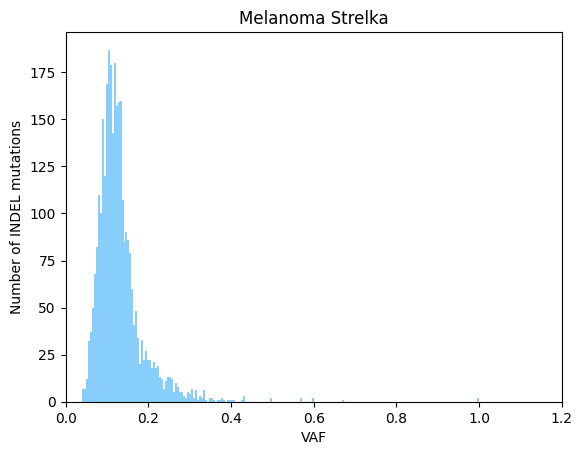

In [63]:
# For INDELs in Strelka

plt.hist(vaf_strelka_ind_df['VAF'].tolist(), bins = 200,color = "lightskyblue")
plt.ylabel('Number of INDEL mutations')
plt.xlim([0,1.2]) 
plt.xlabel('VAF')
plt.title('Melanoma Strelka')
plt.show(vaf_strelka_ind_df['VAF'].tolist()) 